In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('kekrent_eng.csv', delimiter=';', header=None)

In [3]:
df

,0,1
0,"RENT: 35,000THB/month for 1year contract\nLOCA...",1
1,Code: RW97212\n House For Rent@Rawai\n Price 2...,1
2,2 beds 2 baths \n4 parking car\nGarden but no ...,1
3,"35,000THB/month \nThis is in with Modern Tropi...",1
4,"RENT: 35,000THB/month for 1year contract\nLOCA...",1
...,...,...
309,Yamaha X Max 2018\nRent/\nCovid Price Offer fo...,0
310,\n FOR SALE POOL VILLA 3 BEDROOMS SUITES \n 1...,0
311,"The view condominium , nice decoration unit av...",1
312,Happy Days With Airry Car For Rent \n We bring...,0


In [4]:
df.loc[0][0]

'RENT: 35,000THB/month for 1year contract\nLOCATION: CHERNGTALAY\n3 bedrooms Pool Villa near Blue Tree Waterpark with private pool\nClose to Laguna, Bangtao And not far from Layan\nFor Long Term Rental.\nLINE ID: kibkwanpat\nWHATSAPP: +66952977709'

In [5]:
df.rename(columns={0: 'text', 1: 'label'}, inplace=True)

In [6]:
import seaborn as sns

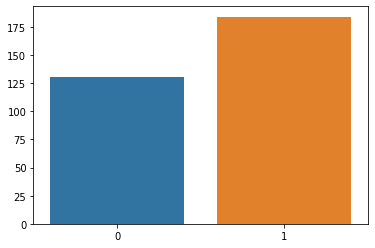

In [7]:
sns.barplot(y=df['label'].value_counts().values, x=df['label'].value_counts().index)

# preprocessing

In [8]:
import re

tokenize = re.compile(r'[\w\d]+')

for line in df.loc[0][0].split('\n'):
    print(tokenize.findall(line.lower()))

['rent', '35', '000thb', 'month', 'for', '1year', 'contract']
['location', 'cherngtalay']
['3', 'bedrooms', 'pool', 'villa', 'near', 'blue', 'tree', 'waterpark', 'with', 'private', 'pool']
['close', 'to', 'laguna', 'bangtao', 'and', 'not', 'far', 'from', 'layan']
['for', 'long', 'term', 'rental']
['line', 'id', 'kibkwanpat']
['whatsapp', '66952977709']


In [9]:
def get_tokens(text):
    lines = []
    for line in text.split('\n'):
        lines += tokenize.findall(line.lower())
        
    return lines

In [10]:
df['tokens'] = df['text'].apply(get_tokens)

In [11]:
df

,text,label,tokens
0,"RENT: 35,000THB/month for 1year contract\nLOCA...",1,"[rent, 35, 000thb, month, for, 1year, contract..."
1,Code: RW97212\n House For Rent@Rawai\n Price 2...,1,"[code, rw97212, house, for, rent, rawai, price..."
2,2 beds 2 baths \n4 parking car\nGarden but no ...,1,"[2, beds, 2, baths, 4, parking, car, garden, b..."
3,"35,000THB/month \nThis is in with Modern Tropi...",1,"[35, 000thb, month, this, is, in, with, modern..."
4,"RENT: 35,000THB/month for 1year contract\nLOCA...",1,"[rent, 35, 000thb, month, for, 1year, contract..."
...,...,...,...
309,Yamaha X Max 2018\nRent/\nCovid Price Offer fo...,0,"[yamaha, x, max, 2018, rent, covid, price, off..."
310,\n FOR SALE POOL VILLA 3 BEDROOMS SUITES \n 1...,0,"[for, sale, pool, villa, 3, bedrooms, suites, ..."
311,"The view condominium , nice decoration unit av...",1,"[the, view, condominium, nice, decoration, uni..."
312,Happy Days With Airry Car For Rent \n We bring...,0,"[happy, days, with, airry, car, for, rent, we,..."


# folds

In [12]:
df['label'].value_counts()

1    184
0    130
Name: label, dtype: int64

In [13]:
import sklearn

sklearn.__version__

'0.24.2'

In [14]:
from sklearn.model_selection import StratifiedKFold

In [15]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)

In [16]:
for i, (train, valid) in enumerate(kfold.split(X=df.index, y=df['label'])):
    df.loc[valid, 'fold'] = i

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

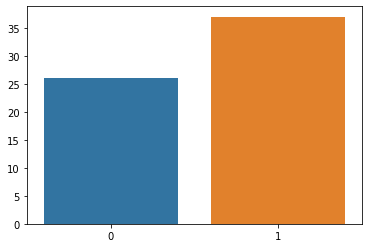

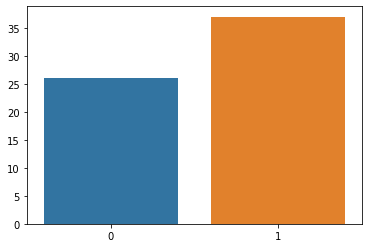

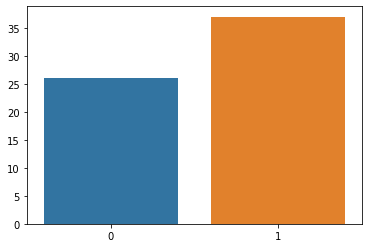

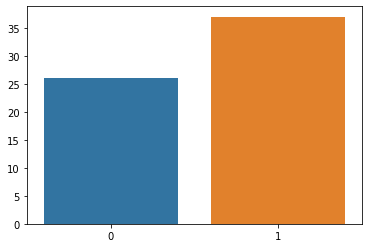

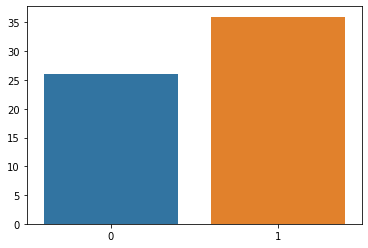

In [18]:
for i in range(5):
    dataset = df[df['fold'] == i]
    sns.barplot(y=dataset['label'].value_counts().values, x=dataset['label'].value_counts().index)
    plt.show()

# model

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.metrics import roc_curve, auc

In [21]:
df

,text,label,tokens,fold
0,"RENT: 35,000THB/month for 1year contract\nLOCA...",1,"[rent, 35, 000thb, month, for, 1year, contract...",1.0
1,Code: RW97212\n House For Rent@Rawai\n Price 2...,1,"[code, rw97212, house, for, rent, rawai, price...",0.0
2,2 beds 2 baths \n4 parking car\nGarden but no ...,1,"[2, beds, 2, baths, 4, parking, car, garden, b...",2.0
3,"35,000THB/month \nThis is in with Modern Tropi...",1,"[35, 000thb, month, this, is, in, with, modern...",2.0
4,"RENT: 35,000THB/month for 1year contract\nLOCA...",1,"[rent, 35, 000thb, month, for, 1year, contract...",2.0
...,...,...,...,...
309,Yamaha X Max 2018\nRent/\nCovid Price Offer fo...,0,"[yamaha, x, max, 2018, rent, covid, price, off...",3.0
310,\n FOR SALE POOL VILLA 3 BEDROOMS SUITES \n 1...,0,"[for, sale, pool, villa, 3, bedrooms, suites, ...",4.0
311,"The view condominium , nice decoration unit av...",1,"[the, view, condominium, nice, decoration, uni...",1.0
312,Happy Days With Airry Car For Rent \n We bring...,0,"[happy, days, with, airry, car, for, rent, we,...",2.0


In [26]:
oof_labels = []
oof_preds = []

for i in range(5):
    train = df[df['fold'] != i]
    valid = df[df['fold'] == i]
    
    pipeline = Pipeline((('vect', TfidfVectorizer(tokenizer=get_tokens)), 
                         ('cls', LogisticRegression(random_state=25))))
    pipeline.fit(train['text'], train['label'])
    print(valid['text'])
    break
    preds = pipeline.predict_proba(valid['text'])[:, 1]
    
    fpr, tpr, threshes = roc_curve(train['label'], pipeline.predict_proba(train['text'])[:, 1])
    train_auc = auc(fpr, tpr)
    fpr, tpr, threshes = roc_curve(valid['label'], pipeline.predict_proba(valid['text'])[:, 1])
    valid_auc = auc(fpr, tpr)
    print(train_auc, valid_auc)
    
    oof_preds.extend(preds.tolist())
    oof_labels.extend(valid['label'].tolist())

1      Code: RW97212\n House For Rent@Rawai\n Price 2...
9      YANUI BEACH PHUKET\nExcellent house Pool Villa...
10     YANUI BEACH PHUKET\nExcellent house Pool Villa...
12     Zcape3 condominium for rent \nStudio 28 sqm. \...
18     Line ID: teddyvicky\nWhatsApp: (+ 66) 64591546...
                             ...                        
275    Condo for rent Dlux condominium \nDlux condomi...
278     POOL VILLA 3 BEDROOMS SUITES \nHOUSE :\n Bedr...
286    Modern 3Bedrooms pool Villa Rawai\nSale 9,600,...
288    (K15) New pool villa for rent\nLOCATION ; #CHA...
300    Happy Days With Airry Car For Rent \n We bring...
Name: text, Length: 63, dtype: object


In [23]:
import joblib
import pickle

In [24]:
byte = pickle.dumps(pipeline)
with open('model.pickle', 'wb') as bm:
    bm.write(byte)

In [24]:
len(oof_preds), len(oof_labels)

(314, 314)

In [25]:
fpr, tpr, threshes = roc_curve(oof_labels, oof_preds)

In [26]:
auc(fpr, tpr)

0.9651337792642141

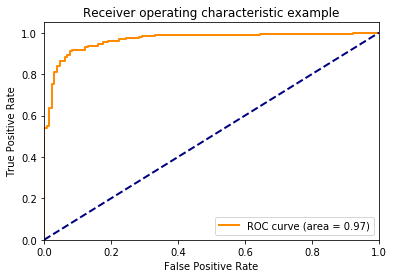

In [27]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()